# 2D Design Template

# Overview

The purpose of this project is for you to apply what you have learnt in this course. This includes working with data and visualizing it, create model of linear regression or logistic regression, as well as using metrics to measure the accuracy of your model. 

Please find the project handout description in the following link:
- [DDW-MU-Humanities Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EaonbI8dXvFHr5I75zUAhGEBXflfC4aZEqtcxPYHS5Jciw?e=s6UTbq)
- [DDW-MU-SocialStudies Handout](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/ETaVN6doTnJElS0Egw34XYQB_VYCwijjNk_05Ft4RctYjg?e=X8iVbw)

There are two parts.
- Part 1 is related to predicting COVID-19 deaths
- Part 2 is open ended and you can find the problem of your interest as long as it is related to COVID-19. The only requirements are the following:
    - The problem can be modelled either using Linear Regression (or Multiple Linear Regression) or Logistic Regression. This means either you are working with continous numerical data or classification. You are not allowed to use Neural Networks or other Machine Learning models.
    - You must use Python and Jupyter Notebook

The following tasks are a general guide to help you do your project for Part 2:
1. Find an interesting problem which you can solve either using Linear Regression or Classification
1. Find a dataset to build your model. You can use [Kaggle](https://www.kaggle.com/datasets) to find your datasets.
1. Use plots to visualize and understand your data.
1. Create training and test data set.
1. Build your model
1. Use metrics to evaluate your model.
1. Improve your model

## Deliverables

You need to submit this Jupyter notebook together with the dataset into Vocareum. Use the template in this notebook to work on this project.

## Rubrics

The rubrics for the scoring can be found in [this link](https://sutdapac-my.sharepoint.com/:b:/g/personal/franklin_anariba_sutd_edu_sg/EdLkuzyCrrJBp5QfVGtdHn8Bj3_epWiQMqv2mwyEei_3JQ?e=fLB0QN).

## Students Submission

Student's Name:
- Ankita Parashar, 1005478
- Ishan Monnappa Kodira, 1005284
- Rohit Raghuram Murarishetti, 1005398
- Sanat Khandekar, 1005281

# Part 1

Write your report here

In [126]:
# write your code here

# Part 2

### Overview About the Problem

COVID-19 has affected every country and has made many individuals aware of the need to buy insurance. Getting treatment for COVID-19 in a hospital can cost up to tens of thousands of dollars without insurance which is way beyond the disposable income for most middle-class families.  Moreover, with some individuals being retrenched during the pandemic would have caused a dip in their savings as well. This made them realize that insurance is important to protect individuals and their families from such financial hardships and provides them with the financial security that each family needs. However, each plan offers different benefits and coverage and not every plan may be suitable for every individual or family. Therefore, potential insurance buyers find it difficult to choose the plan that will allow them to claim most. Hence, we will come up with a model that will help predict the maximum amount claimable according to our chosen features. The features we will be using to judge the maximum coverage will be age, Body Mass Index (BMI), number of children and whether the buyer is a smoker. The predictions that we will be making in our model would be using the historical data claims for the features.  

Singapore healthcare system is subsidized due to Singapore’s universal health coverage programmes such as MediShield Life, MediSave and MediFund. Consequently, one might be unaware of how to choose private insurance policies. Moreover, people might be unaware of the criteria that is used to decide the amount claimable, and these are important factors that need to be taken into consideration before buying an insurance plan.

The features that we have decided to use in our model has a positive correlation with  the amount they can claim. The importance of insurance has been highlighted more now that COVID-19 has impacted almost every country and has killed many sole breadwinners, leaving their family with financial problems. [A study from the University of Michigan](https://labblog.uofmhealth.org/industry-dx/patients-hospitalized-for-covid-could-pay-thousands-of-dollars-study-suggests) found that the cost of hospitalization billed by their insurance is **42,200$** on average. Hence, it is necessary for families not only to insure themselves but to choose the insurance plan that suits their family best based on their requirements.

### Dataset
We are using a dataset that we found on kaggle with data related to personal medical costs as billed by the insurance provider against the columns described below.

#### Columns
- Age: age of primary beneficiary
- Sex: insurance contractor gender, female, male
- BMI: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
- objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- Children: Number of children covered by health insurance / Number of dependents
- Smoker: If the primary beneficiary is a smoker or not
- Region: The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- Charges: Individual medical costs billed by health insurance

Our motivation is to model charges that can be billed for an health insured individual by the insurance based on the features above.

[You can find our dataset here.](https://www.kaggle.com/mirichoi0218/insurance)

In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [128]:
insurance_data = "/Users/rmurarishetti/Documents/DDW_Term 3/insurance.csv"
df_insurance = pd.read_csv(insurance_data)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Function for mapping categorical smoking data to numerical smoking data

In [129]:
def smokermapping(input):
    if input == "yes":
        return 1
    if input == "no":
        return 0

In [130]:
df_insurance["smoker"] = df_insurance["smoker"].apply(smokermapping)
df_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


###  Visualizing the Dataset
- Let us see if any relationships can be uncovered by visualising the dataset using seaborn's pairplot feature

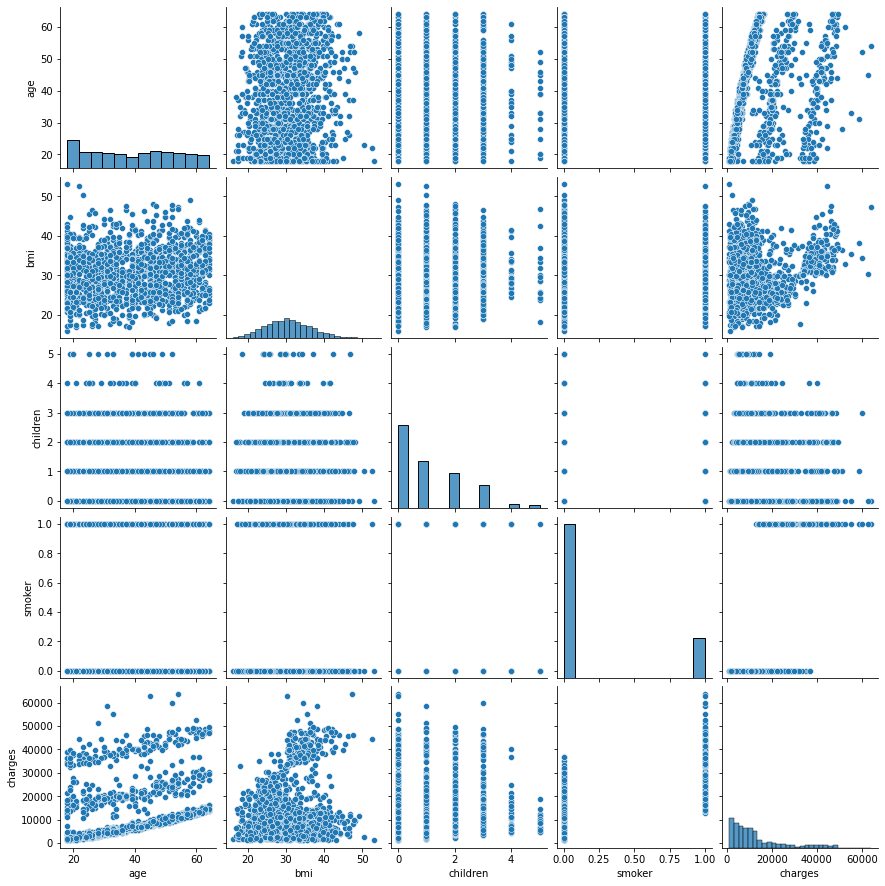

In [131]:
sns.pairplot(df_insurance)

### Cleaning our dataset
We also observed that there is no definitive correlation of the charges above **17,500$** with the chosen features. (See Appendix)

<AxesSubplot:xlabel='age', ylabel='charges'>

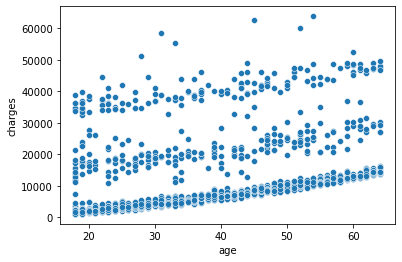

In [132]:
sns.scatterplot(x=df_insurance["age"], y=df_insurance["charges"])

In [133]:
rowselector = df_insurance["charges"]<=17500
df_insurance_cleaned = df_insurance.copy()
df_insurance_cleaned = df_insurance.loc[rowselector, :]
df_insurance_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,1,southwest,16884.9240
1,18,male,33.77,1,0,southeast,1725.5523
2,28,male,33.00,3,0,southeast,4449.4620
4,32,male,28.88,0,0,northwest,3866.8552
5,31,female,25.74,0,0,southeast,3756.6216
...,...,...,...,...,...,...,...
1332,52,female,44.70,3,0,southwest,11411.6850
1333,50,male,30.97,3,0,northwest,10600.5483
1334,18,female,31.92,0,0,northeast,2205.9808
1335,18,female,36.85,0,0,southeast,1629.8335


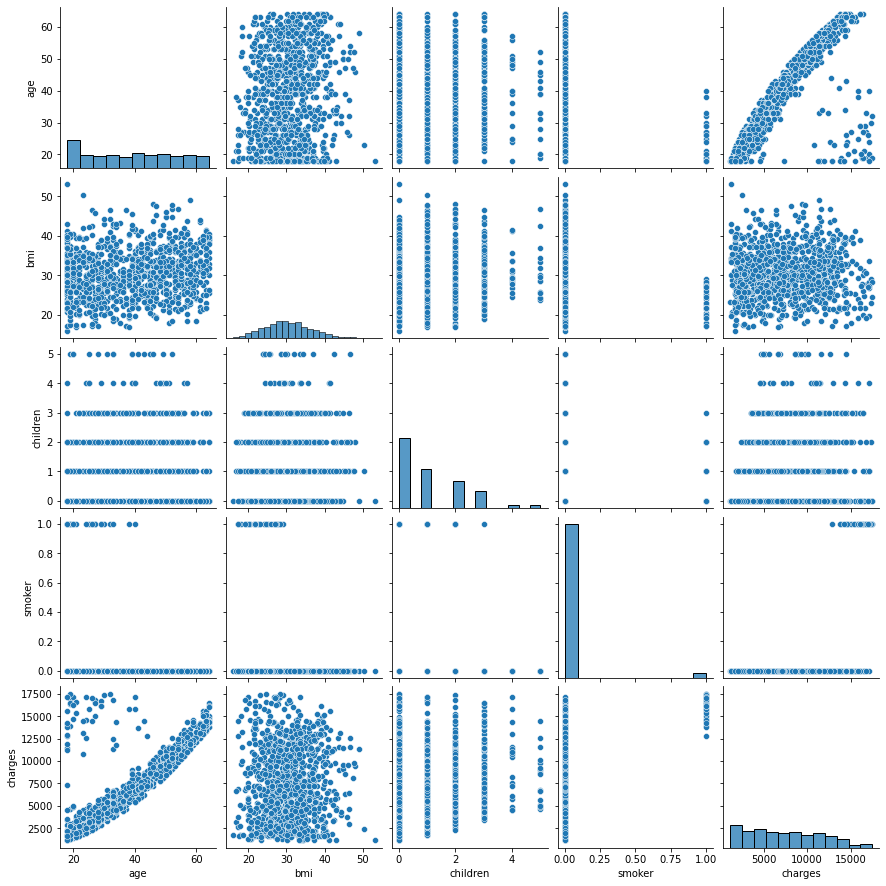

In [134]:
sns.pairplot(df_insurance_cleaned)

### Features and Target Preparation

We will run a multiple linear regression model on a dataset with the target as medical charges coverable by an insurance varying with the features:
- Age: Age of the person insured
- Body Mass Index (BMI): A measure of the insured's physical health
- Children: Children of the insured covered by the insurance
- Smoker: If the insured person is a smoker or not

It is evident that one's physical health detoriates with age, increasing BMI, number of dependants and smoking habits.
Therefore, we decided to include these as our features. We omitted the feature of region and sex because we don't observe a massive variation of charges billed changing over region, sex. Hence, we have decide to not include it.

We will also convert the categorical data of smoker ('yes' or 'no') to numerical data by mapping it to 1 or 0 depending on whether the person is a smoker or not respectively.

Our target value is the column of **Charges**. It is the medical costs that the insurance has billed for the insured.

#### Preparing our features and targets:
1. `get_features_targets(df, feature_names, target_names)` : To get the columns for the features and the targets from the input argument data frame. The function takes in Pandas' dataframe and two lists. The first list is for the feature names and the other list is for the target names.

3. `prepare_feature(df_feature)` : Takes in a data frame for the feature. The function converts the data frame to a numpy array and changes it into a column vector. The function adds a column of constant 1s in the first column.

4. `prepare_target(df_target)` : Takes in a data frame for the target. The function converts the data frame to a numpy array and changes it into column vectors.

1. `normalize_z(df)` Standardization: A function that takes in data frame where all the column are the features and normalize each column according to the following formula.

    $$normalized = \frac{data - \mu}{\sigma}$$

    where $\mu$ is the mean of the data and $\sigma$ is the standard deviation of the data. The function returns a new dataframe.

5. `predict(df_feature, beta)` : This standardizes the feature using z normalization, changes it to a Numpy array, and adds a column of constant 1s. prepare_feature() is used for this purpose. Lastly, this function calls predict_norm() to get the predicted y values.


6. `predict_norm(X, beta)` : Calculates the straight line equation after standardization and adds column for constant 1.


7. `split_data(df_feature, df_target, random_state=None, test_size=0.5)` : Split the Data Frame randomly. The function has the following arguments:
    - df_feature: Data frame for the features.
    - df_target: Data frame for the target.
    - random_state: Seed used to split randomly.
    - test_size: Fraction for the test data set (0 to 1), by default is set to 0.5

    The output of the function is a tuple of four items:
    - df_feature_train: Train set for the features data frame
    - df_feature_test: Test set for the features data frame
    - df_target_train: Train set for the target data frame
    - df_target_test: Test set for the target data frame

8. `r2_score(y, ypred)` : Calculates the coefficient of determination as given by the following equations.

    $$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


9. `mean_squared_error(target, pred)` : Calculate the MSE

    $$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$

10. `adjusted_rsquare(rsquare, samplesize, features)` : This function returns the adjusted r^2 . It is given by the formula:
$$Adjusted  R^2 = 1 - \frac{(N-1)(r^2-1)}{N-p-1}$$
    
- r^2 = sample coefficient of determination
- N = Total sample size
- p = number of features 

The adjusted r^2 method can provide a more precise view of the correlation by additionally taking into account the number of independent variables are added to the particular model.







In [135]:

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    feature = df_feature.to_numpy()
    ones = np.ones((df_feature.shape[0],1))
    X = np.concatenate((ones, feature), axis=1)
    return X
    pass


def prepare_target(df_target):
    return df_target.to_numpy()
    pass

def normalize_z(df):
    dfout = (df - df.mean(axis=0))/df.std(axis=0)
    return dfout
    pass

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indexes = df_feature.index
    if random_state != None:
        np.random.seed(random_state)
    k = int(test_size * len(indexes))
    test_index = np.random.choice(indexes, k, replace=False)
    indexes = set(indexes)
    test_index = set(test_index)
    train_index = indexes - test_index
    df_feature_train = df_feature.loc[train_index, :]
    df_feature_test = df_feature.loc[test_index, :]
    df_target_train = df_target.loc[train_index, :]
    df_target_test = df_target.loc[test_index, :]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
    
def predict(df_feature, beta):
    dfout = normalize_z(df_feature)
    X = prepare_feature(dfout)
    return predict_norm(X, beta)
    pass

def predict_norm(X, beta):
    y = np.matmul(X, beta)
    return y
    pass
 
def r2_score(y, ypred):
    ymean = np.mean(y)
    sstot = np.sum((y-ymean)**2)
    ssres = np.sum((y-ypred)**2)

    r_2 = 1 - (ssres/sstot)
    return r_2
    pass

def mean_squared_error(target, pred):
    n = target.shape[0]
    return (1/n)*np.sum((target-pred)**2)
    pass

def adjusted_rsquare(rsquare, samplesize, features):
    result = 1 - ((1-rsquare)*(samplesize-1)/(samplesize-features-1))
    return result
    

In [136]:
df_insurance_feature, df_insurance_target = get_features_targets(df_insurance_cleaned, ["age", "bmi", "children", "smoker"], ["charges"])
df_insurance_features = normalize_z(df_insurance_feature)

df_insurance_features_train, df_insurance_features_test, df_insurance_target_train, df_insurance_target_test = split_data(df_insurance_features, df_insurance_target, random_state=1000, test_size=0.6)
X = prepare_feature(df_insurance_features_train)
target = prepare_target(df_insurance_target_train)
beta = np.zeros((5,1))


### Building Model

For this model, we will be using multiple linear regression with the features chosen above and the target as ["charges"]. The functions we will be using are:

1. *Multiple variables cost function:* `compute_cost(X, y, beta)` to compute the cost function of a linear regression model. The function should take in two 2-D numpy arrays. The first one is the matrix of the linear equation and the second one is the actual target value.

$$J(\hat{\beta}_0, \hat{\beta}_1) = \frac{1}{2m}\Sigma^m_{i=1}\left(\hat{y}(x^i)-y^i\right)^2$$

        where

$$\hat{y}(x) =  \hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + \ldots + \hat{\beta}_n x_n$$

The function should receive three Numpy arrays:
- `X`: is the feature 2D Numpy array
- `y`: is the target 2D Numpy array
- `beta`: is the parameter 2D Numpy array

The function should return the cost which is a float.

2. *Gradient Descent:* `gradient_descent_multi(X, y, alpha, num_iters)` that takes in four parameters:
- `X`: is a 2-D numpy array for the features
- `y`: is a vector array for the target
- `alpha`: is the learning rate
- `num_iters`: is the number of iteration to perform

The function returns two arrays:
- `beta`: is coefficient at the end of the iteration
- `J_storage`: is the array that stores the cost value at each iteration

In [137]:
def compute_cost(X, y, Beta):
    J = 0
    m = X.shape[0]
    ypred = np.matmul(X, Beta)
    error = y - ypred
    error_sq = np.matmul(error.T, error)
    J = (1/2*m)*error_sq
    return J[0][0]

def gradient_descent(X, y, beta, alpha, num_iters):
    m = X.shape[0]
    J_storage = np.zeros((num_iters, 1))
    for n in range(num_iters):
        driv = np.matmul(X.T, ((np.matmul(X,beta))-y))
        beta = beta - ((1/m))*alpha*driv
        J_storage[n] = compute_cost(X, y, beta)
    return beta, J_storage

[[7515.71654853]
 [3396.49153509]
 [  86.98665682]
 [ 475.71705714]
 [2186.30811008]]


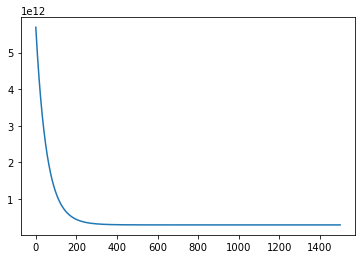

In [138]:
beta, J_storage = gradient_descent(X, target, beta, 0.01, 1500)
print(beta)
plt.plot(J_storage)

In [139]:
pred = predict(df_insurance_features_test, beta)
target = prepare_target(df_insurance_target_test)


### Evaluating the Model

We must be aware that the features we have chosen might not be the only ones that insurance and asset management companies must be using to evaluate maximum claimable amounts for their beneficiaries. To have a holistic evaluation and evaluate different models trying to get to the same target with varying number of features, we must adjust the coefficient of determination for our model to something that can be universally compared.

For this reason we have decided to use the metric of adjusted R^2, this is because it helps us adjust our r^2 for the sample size of the data used and the number of predictor variables chosen.

`adjusted_rsquare(rsquare, samplesize, features)` : This function returns the adjusted r^2 . It is given by the formula:
$$Adjusted  R^2 = 1 - \frac{(N-1)(r^2-1)}{N-p-1}$$
    
- r^2 = sample coefficient of determination
- N = Total sample size
- p = number of features 

The adjusted r^2 method can provide a more precise view of the correlation by additionally taking into account the number of independent variables are added to the particular model.

In [140]:
rscore = r2_score(target, pred)
adjusted_rscore = adjusted_rsquare(rscore, df_insurance_cleaned.shape[0], 4)
print(adjusted_rscore)

0.9026178207606165


Let us look at how well our model predicts the targets using the test dataset.
- Legend:
    - Orange - Predicted Value
    - Blue - Original Target Values

Text(0, 0.5, 'Charges billed by Insurance')

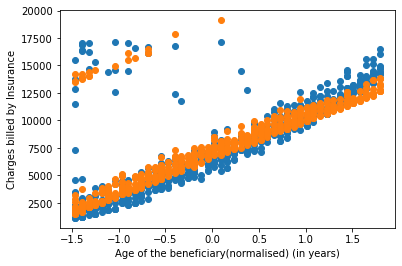

In [141]:
plt.scatter(df_insurance_features_test["age"], target)
plt.scatter(df_insurance_features_test["age"], pred)
plt.xlabel("Age of the beneficiary(normalised) (in years)")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

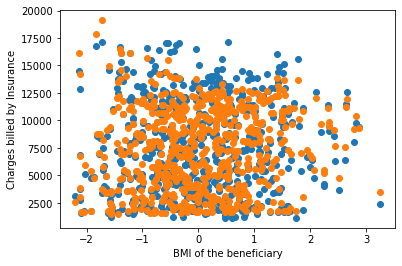

In [142]:
plt.scatter(df_insurance_features_test["bmi"], target)
plt.scatter(df_insurance_features_test["bmi"], pred)
plt.xlabel("BMI of the beneficiary")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

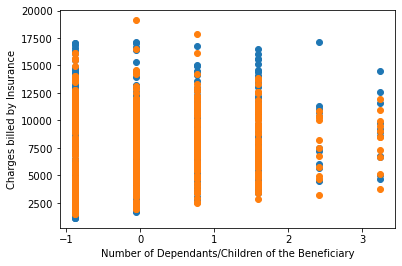

In [143]:
plt.scatter(df_insurance_features_test["children"], target)
plt.scatter(df_insurance_features_test["children"], pred)
plt.xlabel("Number of Dependants/Children of the Beneficiary")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

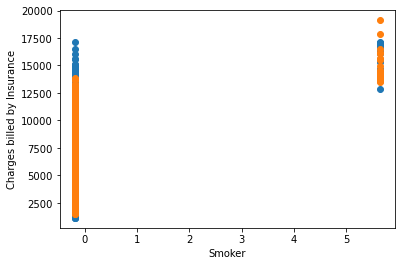

In [144]:
plt.scatter(df_insurance_features_test["smoker"], target)
plt.scatter(df_insurance_features_test["smoker"], pred)
plt.xlabel("Smoker")
plt.ylabel("Charges billed by Insurance")

### Improving the Model

From the pairplot we plotted above we could observe a quadratic relationship between age and charges billed by the insurance. So let us run our regression once again by adjusting this feature.

In [145]:
df_insurance_cleaned["age^2"] = df_insurance_cleaned["age"].apply(lambda item: item**2)
df_insurance_cleaned

/var/folders/yy/rcnbsh9d65s6m7lnl3jl85lw0000gn/T/ipykernel_7521/3075047100.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_insurance_cleaned["age^2"] = df_insurance_cleaned["age"].apply(lambda item: item**2)


,age,sex,bmi,children,smoker,region,charges,age^2
0,19,female,27.90,0,1,southwest,16884.9240,361
1,18,male,33.77,1,0,southeast,1725.5523,324
2,28,male,33.00,3,0,southeast,4449.4620,784
4,32,male,28.88,0,0,northwest,3866.8552,1024
5,31,female,25.74,0,0,southeast,3756.6216,961
...,...,...,...,...,...,...,...,...
1332,52,female,44.70,3,0,southwest,11411.6850,2704
1333,50,male,30.97,3,0,northwest,10600.5483,2500
1334,18,female,31.92,0,0,northeast,2205.9808,324
1335,18,female,36.85,0,0,southeast,1629.8335,324


[[7535.01746048]
 [3502.6651852 ]
 [  66.85287637]
 [ 630.00397567]
 [2173.88566312]]


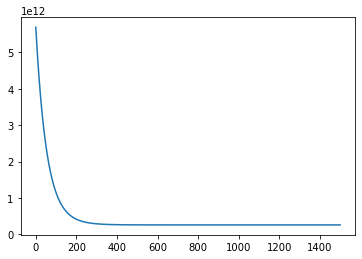

In [146]:
df_insurance_feature, df_insurance_target = get_features_targets(df_insurance_cleaned, ["age^2", "bmi", "children", "smoker"], ["charges"])
df_insurance_features = normalize_z(df_insurance_feature)

df_insurance_features_train, df_insurance_features_test, df_insurance_target_train, df_insurance_target_test = split_data(df_insurance_features, df_insurance_target, random_state=1000, test_size=0.6)
X = prepare_feature(df_insurance_features_train)
target = prepare_target(df_insurance_target_train)
beta_2 = np.zeros((5,1))

beta_2, J_storage = gradient_descent(X, target, beta_2, 0.01, 1500)
print(beta_2)
plt.plot(J_storage)

In [147]:
target = prepare_target(df_insurance_target_test)
pred = predict(df_insurance_features_test, beta_2)
r_scr = r2_score(target, pred)
adj_rscr = adjusted_rsquare(r_scr, df_insurance_features.shape[0], 5)
print(adj_rscr)

0.9246541513315472


Text(0, 0.5, 'Charges billed by Insurance')

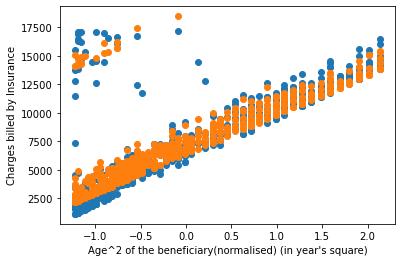

In [148]:
plt.scatter(df_insurance_features_test["age^2"], target)
plt.scatter(df_insurance_features_test["age^2"], pred)
plt.xlabel("Age^2 of the beneficiary(normalised) (in year's square)")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

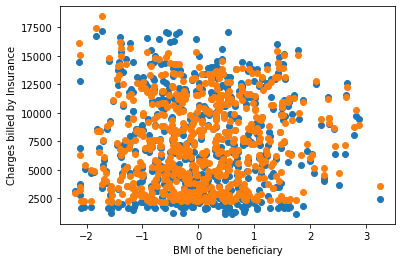

In [149]:
plt.scatter(df_insurance_features_test["bmi"], target)
plt.scatter(df_insurance_features_test["bmi"], pred)
plt.xlabel("BMI of the beneficiary")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

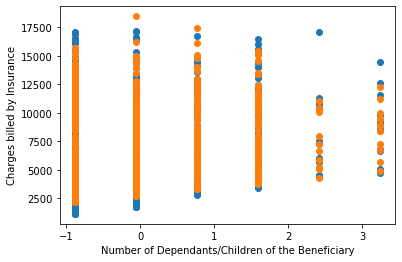

In [150]:
plt.scatter(df_insurance_features_test["children"], target)
plt.scatter(df_insurance_features_test["children"], pred)
plt.xlabel("Number of Dependants/Children of the Beneficiary")
plt.ylabel("Charges billed by Insurance")

Text(0, 0.5, 'Charges billed by Insurance')

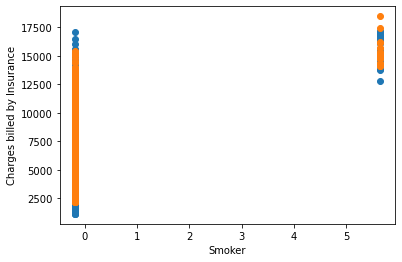

In [151]:
plt.scatter(df_insurance_features_test["smoker"], target)
plt.scatter(df_insurance_features_test["smoker"], pred)
plt.xlabel("Smoker")
plt.ylabel("Charges billed by Insurance")

### Discussion and Analysis

Our model combines data from different regions, demographics of population in the United States to give a prediction of charges that can be billed by an insurance if there is a hopitilization/health expense. Due to the limitations of data, our model can only predict charges claimed by an insurance only in the United States.

Our model has shown us a promising relationship between the chosen features modelled against the charges billed by the insurance for the beneficiary. We saw an **adjusted R^2** of 0.9026 in the first iteration of our multiple linear regression.

Upon visualising the relationships between the features and the target, we saw that the age has a quadratic relationship with the charges. Adjusting for this change in our features, we saw that the **adjusted R^2** bumped up to a value of 0.92465.

This rise can be attributed to the fact that the ailments on is prone to catching upon ageing grows faster than a linear relationship. Therefore, the increase in the adjusted R^2 is one that makes logical sense.

#### Shortcomings and Possible Areas of Improvement:
- An issue we faced during the modelling of our problem was charges billed that were above 17,500$, we could find no definitive relationship among the chosen features and charges (See appendix). A possible improvement would be finding features which give us more insight into the scenario of charges being that high.

- Another constraint, in modelling insurance claims, is that Medical Expenses vary across countries and trying to model expenses in multiple countries using our model may not yield the best results. A possible improvement would be to find data and train a model with country specific features.

### Appendix

Let us visualize the dataset for charges above 17,500$.

In [152]:
df_insurance_rest = df_insurance.copy()
rowselector = df_insurance["charges"]>=17500
df_insurance_rest = df_insurance_rest.loc[rowselector, :]
df_insurance_rest

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,0,northwest,21984.47061
9,60,female,25.840,0,0,northwest,28923.13692
11,62,female,26.290,0,1,southeast,27808.72510
14,27,male,42.130,0,1,southeast,39611.75770
19,30,male,35.300,0,1,southwest,36837.46700
...,...,...,...,...,...,...,...
1318,35,male,39.710,4,0,northeast,19496.71917
1321,62,male,26.695,0,1,northeast,28101.33305
1323,42,female,40.370,2,1,southeast,43896.37630
1328,23,female,24.225,2,0,northeast,22395.74424


If we observe the pairplot below for the relationship between charges and all the other features, we can see that there is no observable relationship. Hence, we decided to omit these values from our consideration.

- age and charges have no particular continous relationship
- bmi and charges have a weak linear relationship
- smoker and charges have a strong relationship with the bulk of the higher charges are for smokers

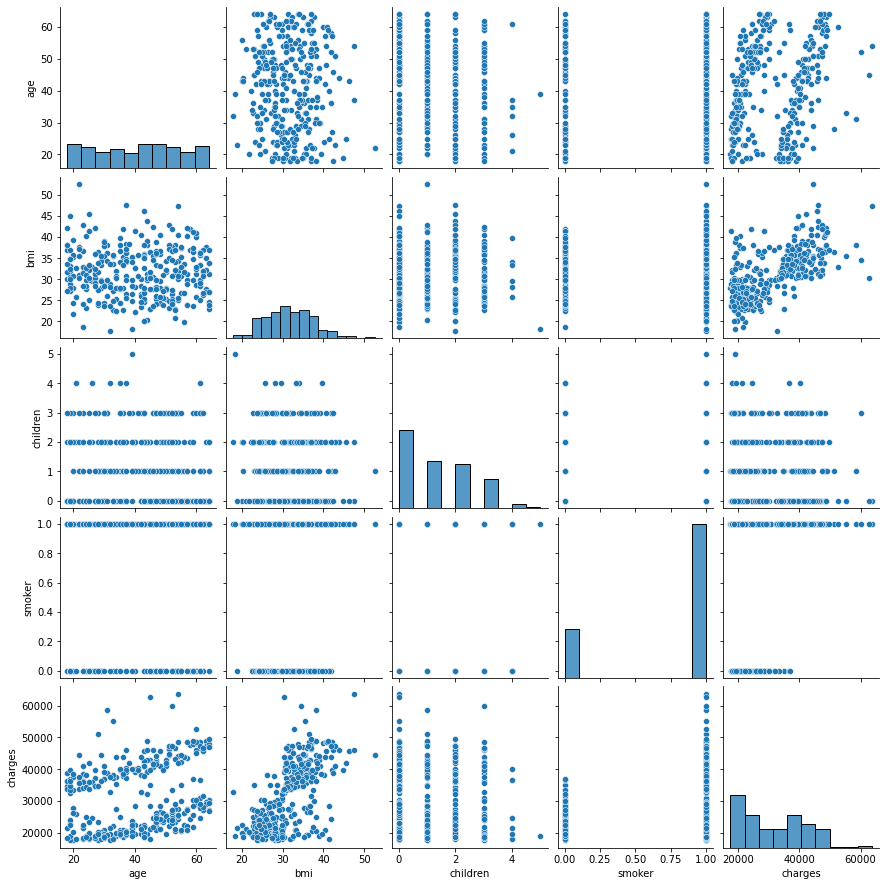

In [153]:
sns.pairplot(df_insurance_rest)